<a href="https://colab.research.google.com/github/neel26parekh/placment_model/blob/main/pacment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv('/content/placement.csv')

`Steps`
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model











In [35]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [36]:
df.shape

(100, 4)

In [37]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [38]:
df = df.iloc[:,1:]

In [39]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [40]:
import matplotlib.pyplot as plt

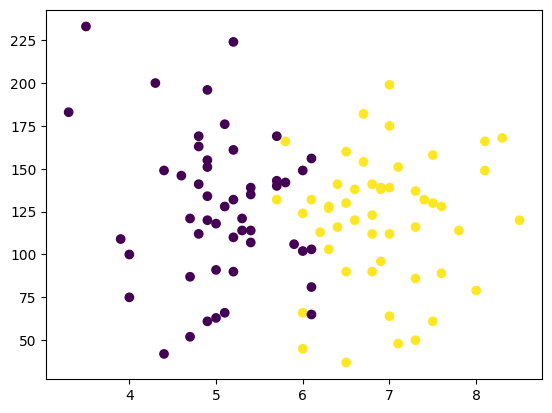

In [41]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
# c is for color


In [44]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [45]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [46]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.1)

In [49]:
x_train

,cgpa,iq
59,4.8,112.0
98,6.3,103.0
82,6.5,37.0
48,6.6,138.0
28,5.2,90.0
...,...,...
90,7.3,86.0
99,6.2,113.0
33,6.0,149.0
14,6.1,103.0


In [50]:
x_test

,cgpa,iq
74,6.7,154.0
89,4.9,151.0
35,6.8,90.0
93,6.8,112.0
42,7.6,89.0
84,5.7,169.0
21,7.1,151.0
41,5.4,114.0
44,7.5,61.0
12,5.4,139.0


In [51]:
y_train

59    0
98    1
82    1
48    1
28    0
     ..
90    1
99    1
33    0
14    0
86    0
Name: placement, Length: 90, dtype: int64

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [79]:
x_train = scaler.fit_transform(x_train)

In [80]:
x_train

array([[-0.99543438, -0.28835819],
       [ 0.30673269, -0.51123046],
       [ 0.48035496, -2.14562709],
       [ 0.5671661 ,  0.35549503],
       [-0.64818983, -0.83315707],
       [ 0.74078838,  0.42978578],
       [ 1.17484406, -0.18930385],
       [-0.8218121 , -0.13977668],
       [-0.99543438,  0.42978578],
       [ 0.91441065, -1.47701029],
       [ 0.13311041, -1.45224671],
       [ 0.82759951,  0.35549503],
       [-1.08224552, -0.90744783],
       [ 0.48035496,  0.9002939 ],
       [-1.08224552, -1.77417331],
       [-0.21413414,  0.20691351],
       [-0.47456755,  0.28120427],
       [-0.8218121 , -0.80839349],
       [ 1.17484406, -1.82370049],
       [ 0.82759951,  0.38025861],
       [-0.90862324,  1.79178298],
       [ 0.91441065,  0.38025861],
       [ 0.82759951, -0.68457556],
       [ 1.34846634,  0.15738634],
       [-0.64818983, -0.33788536],
       [ 0.39354382,  0.42978578],
       [ 0.13311041, -1.05602934],
       [ 0.91441065, -0.28835819],
       [ 0.04629927,

In [81]:
x_test = scaler.transform(x_test)

In [82]:
x_test

array([[ 0.65397724,  0.75171239],
       [-0.90862324,  0.67742163],
       [ 0.74078838, -0.83315707],
       [ 0.74078838, -0.28835819],
       [ 1.43527748, -0.85792066],
       [-0.21413414,  1.12316617],
       [ 1.00122179,  0.67742163],
       [-0.47456755, -0.23883102],
       [ 1.34846634, -1.55130105],
       [-0.47456755,  0.38025861]])

In [83]:
from sklearn.linear_model import LogisticRegression


In [84]:
model = LogisticRegression()

In [85]:
# model training
model.fit(x_train,y_train)

LogisticRegression()

In [86]:
y_predict =model.predict(x_test)

In [87]:
y_test

74    1
89    0
35    1
93    1
42    1
84    0
21    1
41    0
44    1
12    0
Name: placement, dtype: int64

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_test,y_predict)

1.0

In [90]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

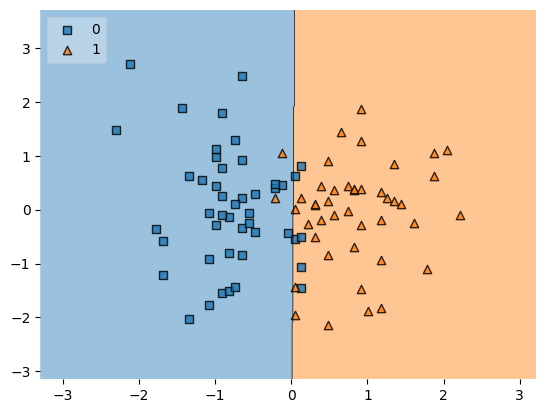

In [91]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

In [92]:
import pickle

In [93]:
pickle.dump(model,open('model.pkl','wb'))